<h2>Lambda Functions</h2>

A lambda function is a small anonymous function that is executed within the line. 

A lambda function can take any number of arguments, but can only have one expression.

In [5]:
products = {"Watch": 200}

# increase price of watch by 100
# lambda variable

priceInc = lambda x: x["Watch"] + 100

products = priceInc(products)

print (products)

300


Advanced usage of lambda

In [1]:
# Real-world: Sorting and filtering
products = [
    {"name": "Laptop", "price": 800},
    {"name": "Phone", "price": 600},
    {"name": "Tablet", "price": 400},
    {"name": "Watch", "price": 200}
]

# Sort by price
sorted_products = sorted(products, key=lambda x: x["price"])
print("Sorted by price:")
for product in sorted_products:
    print(f"{product['name']}: ${product['price']}")

# Filter expensive products
expensive_products = list(filter(lambda x: x["price"] > 500, products))
print("\nExpensive products:")
for product in expensive_products:
    print(f"{product['name']}: ${product['price']}")

Sorted by price:
Watch: $200
Tablet: $400
Phone: $600
Laptop: $800

Expensive products:
Laptop: $800
Phone: $600


<h2>Decorators</h2>


Decorators let you add extra behavior to a function, without changing the function's code.

A decorator is a function that takes another function as input and returns a new function.

Adding a custom timer and logger to another function called process_data. Decorators can be applied using @

In [ ]:
# Real-world: Logging and timing functions
import time
from functools import wraps

def timer(func):
    """Decorator to measure function execution time"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} executed in {end_time - start_time:.4f} seconds")
        return result
    return wrapper

def log_arguments(func):
    """Decorator to log function arguments"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Calling {func.__name__} with args: {args}, kwargs: {kwargs}")
        return func(*args, **kwargs)
    return wrapper

@timer
@log_arguments
def process_data(data, multiplier=1):
    """Simulate data processing"""
    time.sleep(0.1)  # Simulate work
    return [item * multiplier for item in data]

# Using decorated function
result = process_data([1, 2, 3, 4], multiplier=2)
print(f"Result: {result}")

Calling process_data with args: ([1, 2, 3, 4],), kwargs: {'multiplier': 2}
process_data executed in 0.1051 seconds
Result: [2, 4, 6, 8]


<h2>Generators</h2>

Imagine you're reading a really long book. You don't need to have the entire book memorized at once - you just read one page at a time. Generators work exactly like that!

They're a special type of function that produces values one at a time instead of all at once.


In [7]:
# DONOT EXECUTE THIS CODE
def get_all_numbers():
    numbers = []
    for i in range(1000000):  # A MILLION numbers!
        numbers.append(i)
    return numbers  # Returns ALL numbers at once

# This would use a LOT of memory!
all_numbers = get_all_numbers()

Instead of returning the complete list of a million numbers, we "YIELD" them one at a time. USe "NEXT" to move one step further. Generators are like pause buttons for functions. They give you one item, pause, then give the next item when you ask.

In [10]:
def generate_numbers():
    for i in range(1000000):  # Still a million numbers
        yield i  # Gives ONE number at a time

# This uses almost no memory!
number_generator = generate_numbers()
print (next(number_generator))
print (next(number_generator))

0
1


Real-World Example: Netflix vs. DVD Box Set
Regular lists are like getting a complete DVD box set - you get all episodes at once (uses lots of shelf space).

Generators are like Netflix streaming - you get one episode at a time (uses very little space).

In [ ]:
# Netflix-style generator
def netflix_series():
    episodes = ["S1E1", "S1E2", "S1E3", "S1E4", "S1E5"]
    for episode in episodes:
        print(f"Loading {episode} from server...")
        yield episode  # Stream one episode

# Watch one episode at a time
watch = netflix_series()
print("Now watching:", next(watch))  # S1E1
print("Now watching:", next(watch))  # S1E2
# You can pause and come back later!

In [ ]:
# Think about your Instagram or Facebook feed - you don't load all posts ever made at once!

def social_media_feed():
    # Imagine this connects to a database with MILLIONS of posts
    posts = ["Post 1", "Post 2", "Post 3", "Post 4", "Post 5"]
    for post in posts:
        # Simulate loading from server
        print("Loading post from database...")
        yield post

# Scroll through your feed
feed = social_media_feed()
print("Seeing:", next(feed))  # Post 1
print("Seeing:", next(feed))  # Post 2
# Keep scrolling when you're ready!

In [ ]:
# Real-world: Large data processing - IoT Sensor data stream
def read_large_file(filename):
    """Generator to read large files line by line"""
    with open(filename, 'r') as file:
        for line in file:
            yield line.strip()

# Simulate large file processing
def generate_sensor_data():
    """Generator simulating sensor data"""
    import random
    while True:
        yield {
            "temperature": random.uniform(20, 30),
            "humidity": random.uniform(40, 80),
            "timestamp": "2023-10-15"
        }

# Using generator
sensor = generate_sensor_data()
print("Sample sensor readings:")
for _ in range(3):
    print(next(sensor))

Key Benefits:
- Memory Efficient: Don't need to store everything at once
- Lazy Evaluation: Only compute what you need, when you need it
- Can Represent Infinite Streams: Like a never-ending sensor reading

<h2>RegEx</h2>

Regex (short for Regular Expressions) is like a secret code that helps computers find patterns in text. It's like playing "I Spy" with words!

Imagine you're a detective looking for email addresses in a big document. Instead of reading every word, you use your regex magnifying glass to find this pattern:

"some text + @ + some text + . + something"

# Without Regex (Hard way! 😫)
text = "Contact me at alice@email.com or bob@website.net"
# You'd have to manually look for the @ symbol and then check what's around it

In [2]:
# With Regex (Easy way! 😎)
import re # This is called a package. It has abstractions (pre-built code) that helps us find patterns

text = "Contact me at alice@email.com or bob@website.net"

# /S finds any character that is NOT a space or whitespace.
emails = re.findall(r'\S+@\S+\.\S+', text) 
#                        ^             ^
#                        |             |
#                      pattern        string we need to find pattern in
 
print(emails)  # Finds: ['alice@email.com', 'bob@website.net']

['alice@email.com', 'bob1@website.net']


## Complete Regex Cheat Sheet

Here's a comprehensive list of regex patterns with explanations and examples:

## 🔍 Character Classes

| Pattern | Meaning | Example |
|---------|---------|---------|
| `.` | Any single character (except newline) | `a.c` matches "abc", "a c", "a-c" |
| `\d` | Any digit (0-9) | `\d\d` matches "42" in "Room 42" |
| `\D` | Any NON-digit character | `\D\D` matches "Hi" in "Hi123" |
| `\w` | Any word character (a-z, A-Z, 0-9, _) | `\w+` matches "hello" in "hello world" |
| `\W` | Any NON-word character | `\W` matches "!" in "hello!" |
| `\s` | Any whitespace character (space, tab, newline) | `a\sb` matches "a b" |
| `\S` | Any NON-whitespace character | `\S+` matches "hello" in "hello world" |
| `[abc]` | Any character in the brackets | `[aeiou]` matches "e" in "hello" |
| `[^abc]` | Any character NOT in the brackets | `[^aeiou]` matches "h" in "hello" |
| `[a-z]` | Any character in the range | `[a-z]` matches "h" in "Hello" |

## 🔢 Quantifiers

| Pattern | Meaning | Example |
|---------|---------|---------|
| `*` | Zero or more of the previous | `lo*l` matches "ll" and "lol" |
| `+` | One or more of the previous | `lo+l` matches "lol" but not "ll" |
| `?` | Zero or one of the previous | `colou?r` matches "color" and "colour" |
| `{n}` | Exactly n occurrences | `\d{3}` matches "123" |
| `{n,}` | n or more occurrences | `\d{3,}` matches "123" and "12345" |
| `{n,m}` | Between n and m occurrences | `\d{3,5}` matches "123" and "12345" |

## 📍 Position Anchors

| Pattern | Meaning | Example |
|---------|---------|---------|
| `^` | Start of string/line | `^Hello` matches "Hello" at start |
| `$` | End of string/line | `world$` matches "world" at end |
| `\b` | Word boundary | `\bcat\b` matches "cat" but not "category" |
| `\B` | NOT a word boundary | `\Bcat\B` matches "category" but not "cat" |

## 🎯 Grouping and Capturing

| Pattern | Meaning | Example |
|---------|---------|---------|
| `(abc)` | Capture group | `(abc)+` matches "abcabc" |
| `(?:abc)` | Non-capturing group | `(?:abc)+` matches but doesn't capture |
| `a|b` | Match a OR b | `cat|dog` matches "cat" or "dog" |
| `\1`, `\2` | Backreference to group | `(\w)\1` matches "oo" in "book" |

## 🔄 Lookarounds (Advanced)

| Pattern | Meaning | Example |
|---------|---------|---------|
| `(?=abc)` | Positive lookahead | `\d(?=px)` matches "2" in "2px" |
| `(?!abc)` | Negative lookahead | `\d(?!px)` matches "2" in "2em" |
| `(?<=abc)` | Positive lookbehind | `(?<=\$)\d+` matches "100" in "$100" |
| `(?<!abc)` | Negative lookbehind | `(?<!\$)\d+` matches "100" in "¥100" |

## 💡 Special Characters

| Pattern | Meaning | Example |
|---------|---------|---------|
| `\t` | Tab character | `a\tb` matches "a[tab]b" |
| `\n` | Newline character | `a\nb` matches "a[newline]b" |
| `\r` | Carriage return | `a\r\nb` matches Windows newline |
| `\\` | Literal backslash | `\\` matches "\" |
| `\.` | Literal dot | `\.` matches "." |
| `\+` | Literal plus | `\+` matches "+" |
| `\*` | Literal asterisk | `\*` matches "*" |
| `\?` | Literal question mark | `\?` matches "?" |

## 🎨 Flags/Modifiers

| Flag | Meaning | Example |
|------|---------|---------|
| `i` | Case-insensitive | `/hello/i` matches "Hello" and "HELLO" |
| `g` | Global search (find all) | `/a/g` finds all "a" characters |
| `m` | Multiline mode | `/^a/m` matches "a" at start of each line |
| `s` | Dot matches newline | `/a.b/s` matches "a\nb" |


In [13]:
text = "Call me at 123-456-7890 or 987.654.3210"
phones = re.findall(r'\d{3}[-.]\d{3}[-.]\d{4}', text)
print(phones)  # Finds: ['123-456-7890', '987.654.3210']

text = "Call me at +91-9876543210 or +1-123-456-7890 or +91-98765-43210"

# Only numbers starting with +91
only_india = re.findall(r'\+91[-\s]?\d{10}', text)
print("Only +91 numbers:", only_india)  # Finds: ['+91-9876543210', '+91-98765-43210']



['123-456-7890', '987.654.3210']
Only +91 numbers: ['+91-9876543210']


Finding hashtags

In [12]:
text = "I love #Python and #Coding is fun! #100DaysOfCode"
hashtags = re.findall(r'#\w+', text)
print(hashtags)  # Finds: ['#Python', '#Coding', '#100DaysOfCode']

['#Python', '#Coding', '#100DaysOfCode']


Password Checker

In [11]:
def check_password(password):
    # At least 8 chars, contains uppercase, lowercase, and number
    if re.match(r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d).{8,}$', password):
        return "✅ Strong password!"
    else:
        return "❌ Weak password!"

print(check_password("PPPython3"))   # ✅
print(check_password("weak"))      # ❌

✅ Strong password!
❌ Weak password!


Cumulative example

In [ ]:
import re

# Game: Find the hidden treasures in the text!
text = """
I have 3 cats, 2 dogs, and 1 turtle. My phone number is (555) 123-4567.
Visit my website at www.mysite.com or email me at friend@example.org!
I have $25.50 in my pocket. My favorite colors are #FF0000 and #00FF00.
"""

# Your mission: Find these treasures!
numbers = re.findall(r'\d+', text)          # All numbers
phones = re.findall(r'\(\d{3}\) \d{3}-\d{4}', text)  # Phone numbers
emails = re.findall(r'\S+@\S+\.\S+', text)  # Email addresses
colors = re.findall(r'#\w{6}', text)        # Color hex codes
money = re.findall(r'\$\d+\.\d{2}', text)   # Money amounts

print("Numbers found:", numbers)
print("Phone numbers:", phones)
print("Emails:", emails)
print("Colors:", colors)
print("Money:", money)

In [14]:
pip install sentence-transformers scikit-learn matplotlib seaborn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 41.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
    Found existing installation: pyparsing 3.2.3━━━━━━━━━━━━━━ 1/7 [sympy]
    Uninstalling pyparsing-3.2.3:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
      Successfully uninstalled pyparsing-3.2.3━━━━━━━━━━━━━━━━ 1/7 [sympy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [sentence-transformers]ence-transformers]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Original Texts:
Text 1: Cirle
Text 2: Moon

EMBEDDING VECTOR DETAILS

Text 1: 'Cirle'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.10893498  0.03595039 -0.06637424 -0.01509547 -0.09647939  0.01099858
  0.08054182  0.12463383  0.08885039  0.03328664]
Mean: 0.000681
Std: 0.051026
Min: -0.175070
Max: 0.167510

Text 2: 'Moon'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [ 9.2148031e-05  3.4934804e-02  4.1344851e-02  6.0127750e-02
 -9.0935603e-02 -4.2241585e-02  6.7362666e-02 -4.3818843e-02
  2.1339612e-02 -1.8132750e-02]
Mean: 0.000873
Std: 0.051024
Min: -0.138981
Max: 0.194545

Text 3: 'Harry Potter'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.06422769 -0.00430152 -0.04282691  0.03793846 -0.10789489 -0.01337648
  0.0463733  -0.02006128  0.08278275 -0.0571144 ]
Mean: 0.001121
Std: 0.051019
Min: -0.139833
Max: 0.179643

Text 4: 'Wand'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.04456525  0.00198564 -0.00982396 -0.0109

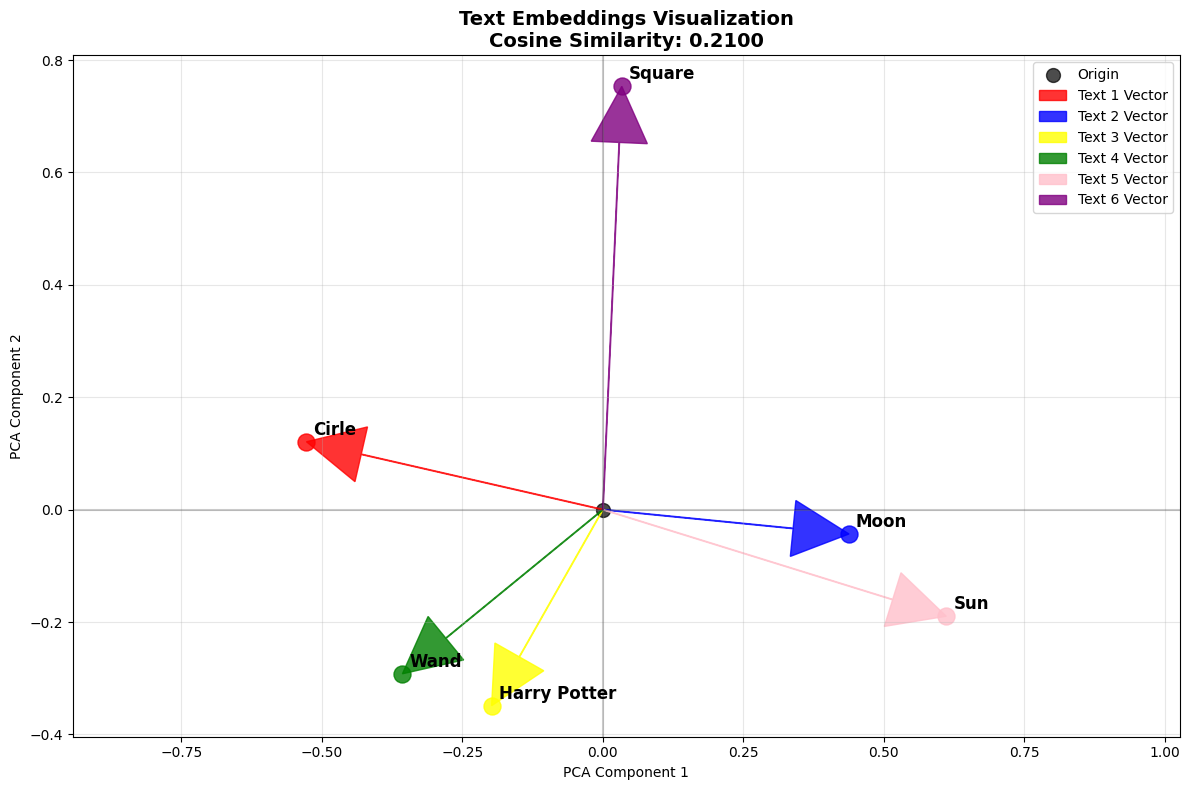


VECTOR INFORMATION:
Cirle magnitude: 0.5412
Moon magnitude: 0.4401
Harry Potter magnitude: 0.4013
Wand magnitude: 0.4612
Sun magnitude: 0.6398
Square magnitude: 0.7541

Cosine Similarity between texts: 0.2100


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import seaborn as sns

def get_embeddings_sentence_transformers(texts):
    """Get embeddings using Sentence Transformers"""
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight model
    embeddings = model.encode(texts)
    return embeddings

def visualize_embeddings(embeddings, texts):
    """Visualize embeddings using PCA for dimensionality reduction"""
    # Reduce dimensions to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot origin point
    plt.scatter(0, 0, color='black', s=100, marker='o', label='Origin', alpha=0.7)
    
    # Plot the vectors from origin to each point
    colors = ['red', 'blue','yellow','green','pink','purple']
    for i, (x, y) in enumerate(embeddings_2d):
        # Draw vector arrow from origin to point
        plt.arrow(0, 0, x, y, 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], 
                 length_includes_head=True, 
                 alpha=0.8, 
                 label=f'Text {i+1} Vector')
        
        # Plot the endpoint
        plt.scatter(x, y, color=colors[i], s=150, alpha=0.8)
        
        # Add text label near the endpoint
        plt.annotate(f'{texts[i]}', (x, y), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    # Calculate and display cosine similarity
    similarity = np.dot(embeddings[0], embeddings[1]) / (
        np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1])
    )
    
    # Calculate vector magnitudes
    magnitudes = [np.linalg.norm(vec) for vec in embeddings_2d]
    
    plt.title(f'Text Embeddings Visualization\nCosine Similarity: {similarity:.4f}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.2)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.2)
    plt.legend()
    
    # Set equal aspect ratio for proper vector representation
    plt.axis('equal')
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print vector information
    print("\nVECTOR INFORMATION:")
    for i, mag in enumerate(magnitudes):
        print(f"{texts[i]} magnitude: {mag:.4f}")
    
    return embeddings_2d, similarity

def display_vector_details(embeddings, texts):
    """Display detailed information about the vectors"""
    print("=" * 60)
    print("EMBEDDING VECTOR DETAILS")
    print("=" * 60)
    
    for i, (text, embedding) in enumerate(zip(texts, embeddings)):
        print(f"\nText {i+1}: '{text}'")
        print(f"Vector shape: {embedding.shape}")
        print(f"Vector dtype: {embedding.dtype}")
        print(f"First 10 values: {embedding[:10]}")
        print(f"Mean: {np.mean(embedding):.6f}")
        print(f"Std: {np.std(embedding):.6f}")
        print(f"Min: {np.min(embedding):.6f}")
        print(f"Max: {np.max(embedding):.6f}")

# Main execution
if __name__ == "__main__":
    # Example texts
    text1 = "Pentagon"
    text2 = "Moon"
    text3 = "Harry Potter"
    text4 = "Wand"
    text5 = "Sun"
    text6 = "Square"
    print("Original Texts:")
    print(f"Text 1: {text1}")
    print(f"Text 2: {text2}")
    print()
    
    # Get embeddings
    texts = [text1, text2,text3,text4,text5,text6]
    embeddings = get_embeddings_sentence_transformers(texts)
    
    # Display vector details
    display_vector_details(embeddings, texts)
    
    # Visualize embeddings
    embeddings_2d, similarity = visualize_embeddings(embeddings, texts)
    
    print(f"\nCosine Similarity between texts: {similarity:.4f}")